# Import Libray

In [1]:
from live_connection import Live_connection 
from IoT.IoT import Fan_Control,Light_Control,Buzzer_Control
from audioplayer import AudioPlayer
import threading
import torch
from PIL import Image
from io import BytesIO, StringIO
import math
import time
import numpy as np
from IPython.display import display,update_display,Audio , Image as ipyImage
import ipywidgets as widgets
from loguru import logger
from collections import deque
%matplotlib inline
from matplotlib import pyplot as plt

# Setup stuffs

## Setup logger

> output from live_connection.py are not iterpreted by the logger

In [2]:
LogStream = StringIO()
logger.add("logs/file_{time}.log", format="{time:YYYY-MM-DD at HH:mm:ss} | {level} | {message}", rotation="50MB")
logger.add(LogStream)
logdeque = deque(maxlen=10)
posLogStream = 0

## Load and setup model
![img/yolo_model_graph.png](img/yolo_model_graph.png)

In [3]:
# you can change to other yolo model(they are not tested,but less cpu usage)
# you may take reference to the graph
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6', pretrained=True) # default yolov5x6
model.classes = [0,59,63,67]# person, bed, laptop(as some phone can be detact by laptop), cell phone 
torch.set_num_interop_threads(8)# improve performance, you may change according to your cpu
torch.set_num_threads(8)
#model.cpu() , if you want to use cpu;model.cuda() if you want to use gpu

Using cache found in C:\Users\Tommy AU/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-1 Python-3.10.9 torch-1.12.1 CPU

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


## 🚩 Here is the place to start the program
## Start and Setup socket(Connect camera) and Other IoT devices
## And Call main()
<br>

> #### ⚠  There maybe exeption message pop up when you restart the socket, ignore it will do the job<br>But if it this error from system os it is recommend to use another port


> #### ⚠  There maybe error message pop up when you restart the socket, ignore it will do the job<br>
> Examples error<br>
    frameid = splited[1]<br>
IndexError: list index out of range<br>

> #### "WARNING NMS time limit 0.550s exceeded" can be ignore

> #### 🎥 The image will have a high latency then the actuall latency,<br>   As the render of image use >10 sec.<br>Stuff is still working on normal latency, only the image preview is slow.

> #### ⚠  If none of the above work try to restart kernel or even restart pc

binding to 192.168.0.210 7778


Button(description='Stop', style=ButtonStyle())

2023-06-23 20:39:43.519 | INFO     | __main__:main_analysis:2 - Main starts


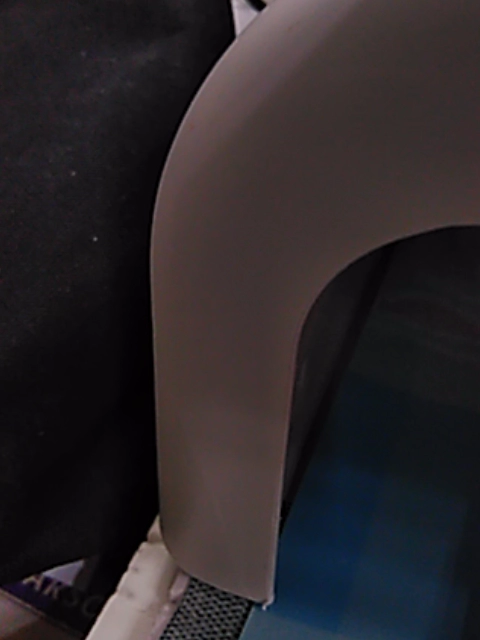

Button(description='Stop', style=ButtonStyle())

('192.168.0.193', 44028) connected
accept?(y/n)


2023-06-23 20:39:50.133 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:51.270 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:52.441 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:53.626 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:54.783 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:56.278 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:57.397 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:59.033 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:00.756 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:02.326 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:04.333 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:05.957 | INFO     | __main__:main_analysis:10 - new frame
WARNING  NMS time limit 0.550s exceeded
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:

Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:39:54.783 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:56.278 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:57.397 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:59.033 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:00.756 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:02.326 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:04.333 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:05.957 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.814 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run


Button(description='Stop', style=ButtonStyle())

    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
2023-06-23 20:40:08.253 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
WARNING  NMS time limit 0.550s exceeded
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None

Exception in thread Thread-898 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner



2023-06-23 20:39:54.783 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:56.278 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:57.397 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:59.033 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:00.756 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:02.326 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:04.333 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:05.957 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.814 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
2023-06-23 20:40:09.249 | INFO     | __main__:main_analysis:10 - new frame
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:39:57.397 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:39:59.033 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:00.756 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:02.326 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:04.333 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:05.957 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.814 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:08.253 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:09.249 | INFO     | __main__:main_analysis:10 - new frame



2023-06-23 20:40:09.575 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread WARNING  NMS time limit 0.550s exceeded
Thread-910 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
2023-06-23 20:40:10.399 | INFO     | __main__:main_analysis:10 - new frame
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:10.693 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:11.291 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-922 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib

Button(description='Stop', style=ButtonStyle())

    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:04.333 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:05.957 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.814 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:08.253 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:09.249 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:09.575 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:10.399 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:10.693 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:11.291 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:12.815 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None


Button(description='Stop', style=ButtonStyle())

Exception in thread Thread-935 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner


Body temp: [], Bed temp: None
2023-06-23 20:40:07.329 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:07.814 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:08.253 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:09.249 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:09.575 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:10.399 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:10.693 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:11.291 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:11.810 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:12.815 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:13.875 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:14.277 | INFO     | __main__:detectsleep:51 - Sleeping
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music


Button(description='Stop', style=ButtonStyle())

2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-947 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame


Body temp: [0], Bed temp: None
2023-06-23 20:40:09.249 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:09.575 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:10.399 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:10.693 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:11.291 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:11.810 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:12.815 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:13.875 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:14.277 | INFO     | __main__:detectsleep:51 - Sleeping
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music



    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-960 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:11.291 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:11.810 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:12.815 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:13.875 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:14.277 | INFO     | __main__:detectsleep:51 - Sleeping
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music
2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None


Button(description='Stop', style=ButtonStyle())

Exception in thread Thread-969 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
TypeError: '<' not supported between instances of 'NoneType' and 'int'
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature


Body temp: [], Bed temp: None
2023-06-23 20:40:11.810 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:12.815 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:13.875 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:14.277 | INFO     | __main__:detectsleep:51 - Sleeping
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music
2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
Exception in thread Thread-979 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None


Body temp: [], Bed temp: None
2023-06-23 20:40:14.277 | INFO     | __main__:detectsleep:51 - Sleeping
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music
2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame



Exception in thread Thread-989 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music
2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



Button(description='Stop', style=ButtonStyle())

2023-06-23 20:40:20.106 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None


Body temp: [], Bed temp: None
2023-06-23 20:40:14.563 | INFO     | __main__:OnLyingBed:8 - playing music
2023-06-23 20:40:15.129 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:15.273 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:15.757 | INFO     | __main__:OnLyingBed:22 - Aircon on
2023-06-23 20:40:16.073 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



Exception in thread Thread-1001 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:20.505 | INFO     | __main__:detections:97 - Lying on bed for 11.098241090774536 seconds
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1011 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\l

Button(description='Stop', style=ButtonStyle())

TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:16.545 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.106 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.505 | INFO     | __main__:detections:97 - Lying on bed for 11.098241090774536 seconds
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1022 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:18.274 | INFO     | __main__:detectmoving:39 - Not moving for 7.164562225341797 seconds
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.106 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.505 | INFO     | __main__:detections:97 - Lying on bed for 11.098241090774536 seconds
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1033 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run


Button(description='Stop', style=ButtonStyle())

    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame


Body temp: [], Bed temp: None
2023-06-23 20:40:18.671 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:18.742 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.106 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.505 | INFO     | __main__:detections:97 - Lying on bed for 11.098241090774536 seconds
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1045 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature


Button(description='Stop', style=ButtonStyle())

2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:18.962 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.106 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:20.505 | INFO     | __main__:detections:97 - Lying on bed for 11.098241090774536 seconds
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
Exception in thread Thread-1056 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1065 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in O

Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:20.625 | INFO     | __main__:detectsleep:55 - Sleeping for 11.098241090774536 seconds
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:20.676 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame



2023-06-23 20:40:25.476 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1076 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:20.729 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:21.337 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:22.934 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:25.476 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:26.708 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:27.885 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1089 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run


Button(description='Stop', style=ButtonStyle())

    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:23.394 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:24.163 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:25.476 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:26.708 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:27.885 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame



2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1100 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:24.589 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:24.596 | INFO     | __main__:detectmoving:31 - Not moving
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:25.476 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:26.708 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:27.885 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:29.803 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1113 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run


Button(description='Stop', style=ButtonStyle())

2023-06-23 20:40:31.485 | INFO     | __main__:main_analysis:10 - new frame
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:24.852 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:25.219 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:25.476 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:26.708 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:27.885 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:29.803 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1125 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:26.708 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:27.885 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:29.803 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:31.485 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:34.494 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1137 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:28.034 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:29.803 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:31.485 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:34.494 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread 2023-06-23 20:40:35.972 | INFO     | __main__:main_analysis:10 - new frame
Thread-1149 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner


Button(description='Stop', style=ButtonStyle())

    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:28.327 | INFO     | __main__:detectmoving:39 - Not moving for 10.250167846679688 seconds
2023-06-23 20:40:28.431 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:29.803 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:31.485 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:34.494 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



Exception in thread Thread-943 (OnLyingBed):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\site-packages\urllib3\connectionpool.py", line 398, in _make_request
    conn.request(method, url, **httplib_request_kw

Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:31.277 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:31.485 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:34.494 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.972 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:37.451 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:38.074 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:39.030 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:39.967 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1175 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature


Button(description='Stop', style=ButtonStyle())

TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:33.059 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:33.168 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:34.494 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.972 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:37.451 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:38.074 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:39.030 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:39.967 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:40.683 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:42.111 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1187 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
2023-06-23 20:40:42.268 | INFO     | __main__:main_analysis:10 - new frame
    

Button(description='Stop', style=ButtonStyle())

self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Body temp: [], Bed temp: None
2023-06-23 20:40:34.562 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.972 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:37.451 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:38.074 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:39.030 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:39.967 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:40.683 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:42.111 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:42.268 | INFO     | __main__:main_analysis:10 - new frame



2023-06-23 20:40:43.033 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1199 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:35.697 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:35.972 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:37.451 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:38.074 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:39.030 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:39.967 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:40.683 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:42.111 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:42.268 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:43.033 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'
2023-06-23 20:40:44.091 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:45.279 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1211 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


Button(description='Stop', style=ButtonStyle())

Body temp: [], Bed temp: None
2023-06-23 20:40:37.451 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:38.074 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:39.030 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:39.967 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:40.683 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:42.111 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:42.268 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:43.033 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
2023-06-23 20:40:44.091 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:45.279 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None



2023-06-23 20:40:45.784 | INFO     | __main__:main_analysis:10 - new frame
2023-06-23 20:40:46.187 | INFO     | __main__:OnTemperature:6 - tempPerson: [], tempBed: None
Exception in thread Thread-1222 (OnTemperature):
Traceback (most recent call last):
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner


KeyboardInterrupt: 

    self.run()
  File "c:\Users\Tommy AU\.conda\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tommy AU\AppData\Local\Temp\ipykernel_27868\1052446600.py", line 22, in OnTemperature
TypeError: '<' not supported between instances of 'NoneType' and 'int'


: 

In [28]:
#URl of cohntroller
# addr = "http://192.168.43.151:7777/controller"
# x = input("Address to bind(enter for default):")
# if x != "":
#     addr = x
# # Connect IoT devices
# fan = Fan_Control(addr)
# light = Light_Control(addr)
# buzzer = Buzzer_Control(addr)
# aircon = fan.get_fan_state() # use fan for aircon temporarily
# lights = light.get_light_state()
addr = "192.168.0.210"## use ipconfig to find the ip address of the computer
x = input("Address to bind(enter for default):")
if x != "":
    addr = x
try:
    if live_connection != None and not live_connection.died:
        live_connection.terminate()
except NameError:
    pass
live_connection = None
live_connection = Live_connection(addr,7778)    # 7777 is the default port, use other port if the port is blocked

t1 = threading.Thread(target=live_connection.start_connection,kwargs={"nolog":True},group=None)
# nolog = True
t1.start()
term = True
button_download = widgets.Button(description = 'Stop')   
button_download.on_click(onclick)
display(button_download)
main_analysis()

### Force Stop
> Press start and stop the below cell multiple times to kill the program

In [4]:
def onclick(arg):
    term = False
    live_connection.terminate()
    t1.terminate()
    live_connection = None

### Close socket if needed
> or reset some var

In [5]:
# live_connection.ss.close()
# live_connection = None

## Variable of current state

In [6]:
#global tolerance
tolerance = 10
## Person exist
personexist = False
## lying bed
lyingonbed = False
startlyingtime = 0
notlyingtimestart = 0
chancelying = 3
## touching phone
Touchingphone = False
starttouchingtime = 0
nottouchingtimestart = 0
chanceTouching = 3
## sleeping
sleeping = False
startsleepingtime = 0
notsleepingtimestart = 0
## not moving
notmoving = False
lastposition = [0,0,0,0]
toleranceOfNotMoving = 10
startnotmovingtime = 0
movingtimestart = 0
chancenotmoving = 2
## temperatures
tempPerson = []
### core temp requires face recongnition
tempBed = -1

# Condition for automation

## Person detection

In [7]:
def isPersonAvailable(pandas)-> bool:
    return 0 in pandas['class'].array

## Bed lying detection

In [8]:
def isLyinOnBed(pandas,k:int)->bool:
    #pandasDataFrame is the output of model(pandas.DataFrame)
    #return true if the person is lying on the bed
    #return false if the person is not lying on the bed

    # Check if the person is on bed     
    if not(0 in pandas['class'].array):
        return False
    # Calculate the length ratio of person on the bed
    personxlen = pandas[pandas['class'] == 0]['xmax'].array[k] - pandas[pandas['class'] == 0]['xmin'].array[k]
    personylen = pandas[pandas['class'] == 0]['ymax'].array[k] - pandas[pandas['class'] == 0]['ymin'].array[k]
    if not(59 in pandas['class'].array):
        if personylen>personxlen:
            if(personylen/personxlen>3 and personylen/personxlen<5):# acoording to web data, the ratio of length to  shoulder is 4:1
                return True
            else:
                return False
    bedxlen = pandas[pandas['class'] == 59]['xmax'].array[0] - pandas[pandas['class'] == 59]['xmin'].array[0]
    bedylen = pandas[pandas['class'] == 59]['ymax'].array[0] - pandas[pandas['class'] == 59]['ymin'].array[0]

    if bedxlen > bedylen :
            return personxlen/bedxlen > 0.6
    else:
            return personylen/bedylen > 0.6


## Touching phone detection

In [9]:
def isTouchingPhone(pandas,person)->bool:
    #pandasDataFrame is the output of model(pandas.DataFrame)
    #return true if the person is touching the phone
    #return false if the person is not touching the phone
    #return None if the person is not in the frame
    # Check if the person is on bed
    phone = []
    if 63 in pandas['class'].array:
        phone.append(pandas[pandas['class'] == 63])
    if 67 in pandas['class'].array:
        phone.append(pandas[pandas['class'] == 67])
    if len(phone) == 0:
        return False
    # see if the person touches the phone
    overlapArea = 0
    people = pandas[pandas['class'] == 0]
    for x in person:
        for y in phone:
            for z in range(len(y)):
                x_overlap = max(0, min(y['xmax'].array[z], people['xmax'].array[x]) - max(y['xmin'].array[z], people['xmin'].array[x]));
                y_overlap = max(0, min(y['ymax'].array[z], people['ymax'].array[x]) - max(y['ymin'].array[z], people['ymin'].array[x]));
                overlapArea = max(overlapArea,x_overlap * y_overlap);
                areaphone = (y['xmax'].array[z] - y['xmin'].array[z])*(y['ymax'].array[z] - y['ymin'].array[z])
                time.sleep(1)
                if overlapArea/areaphone > 0.3:
                    return True
    return False

## Human movement detection

In [10]:
def isnotmoving(pandas)->bool:
    #pandasDataFrame is the output of model(pandas.DataFrame)
    #return true if the person is not moving
    #return false if the person is moving
    #return None if the person is not in the frame
    # Check if the person is on bed
    person = pandas[pandas['class'] == 0]
    if len(person) == 0:
        return None
    else:
        x = person['xmin'].array[0]
        y = person['ymin'].array[0]
        x2 = person['xmax'].array[0]
        y2 = person['ymax'].array[0]
        if abs(x - lastposition[0]) < toleranceOfNotMoving and abs(y - lastposition[1]) < toleranceOfNotMoving and abs(x2 - lastposition[2]) < toleranceOfNotMoving and abs(y2 - lastposition[3]) < toleranceOfNotMoving:
            return True
        else:
            lastposition[0] = x
            lastposition[1] = y
            lastposition[2] = x2
            lastposition[3] = y2
            return False

## Bed Temperature

In [11]:
def insideBed(x,y,bedlist):
    return x >= bedlist[0] and x <= bedlist[2] and y >= bedlist[1] and y <= bedlist[3]
def insideOtherObject(x,y,lst):
    for i in range(len(lst)):
        if x >= lst['xmin'].array[i] and x <= lst['xmax'].array[i] and y >= lst['ymin'].array[i] and y <= lst['ymax'].array[i]:
            return True
    return False
def bedtemperature(pandas,thermal,size):
    ## calculate the temperature of the bed by calculate the average temperature of the bed exclude the person
    ## return the temperature of the bed
    if(59 not in pandas['class'].array):
        return None
    temp = 0
    count = 0
    sy = len(thermal)
    sx = len(thermal[0])
    #caches
    bedlist = np.array([pandas[pandas['class'] == 59]['xmin'].array[0],pandas[pandas['class'] == 59]['ymin'].array[0],pandas[pandas['class'] == 59]['xmax'].array[0],pandas[pandas['class'] == 59]['ymax'].array[0]])
    otherobjects = pandas[pandas['class']!=59]
    for y,t in enumerate(thermal):
        for x,val in enumerate(t):
            # exclude persons and the extra objects
            # only count the temperature of the bed
            ix = x/sx*size[0]
            iy = y/sy*size[1]
            if insideBed(ix,iy,bedlist) and not insideOtherObject(ix,iy,otherobjects):
                val = val/100 - 273
                count+=1
                temp = temp + (val - temp)/count
    return temp 

## Body Temperature

In [12]:
def bodytemperture(pandas,thermal,size,k:int):
    ## calculate the temperature of the person by calculate the average temperature of the person
    ## return the temperature of the person
    ## reduce the insignificant temperature(extermely low or high,ie >40, <30)
    temp = 0
    count = 0
    sx = len(thermal[0])
    sy = len(thermal)
    xmax = pandas[pandas['class'] == 0]['xmax'].array[k]
    xmin = pandas[pandas['class'] == 0]['xmin'].array[k]
    ymax = pandas[pandas['class'] == 0]['ymax'].array[k]
    ymin = pandas[pandas['class'] == 0]['ymin'].array[k]
    for y,t in enumerate(thermal):
        for x,val in enumerate(t):
            ix = x/sx*size[0]
            iy = y/sy*size[1]
            val = val/100 - 273
            ## check if the point is in the person
            if ( xmax <= ix and ix >= xmin ) \
            and                                                                                                                     \
               ( ymax <= iy and iy >= ymin ) \
            and val < 40 and val > 30:
                 count+=1
                 temp = temp + (val - temp)/count
    return temp

## Detection Main

In [13]:
## touching phone
def detecttouch(pandas,person,timenow):
    global nottouchingtimestart,starttouchingtime,Touchingphone,chanceTouching
    if isTouchingPhone(pandas,person):
        chanceTouching = 0
        if not Touchingphone:
            Touchingphone = True
            starttouchingtime = timenow
            nottouchingtimestart = 0
            logger.info("Touching phone")
            # print("Touching phone")
    else:
        if Touchingphone:
            chanceTouching += 1
            if chanceTouching > 3:
                nottouchingtimestart = timenow
                Touchingphone = False
                logger.info("Touching phone for {time} seconds".format(time=timenow-starttouchingtime))
                # print("Touching phone for",timenow-starttouchingtime,"seconds")
                starttouchingtime = 0

## is not moving
def detectmoving(pandas,timenow):
    global notmoving,startnotmovingtime,movingtimestart,chancenotmoving
    if isnotmoving(pandas):
        chancenotmoving = 0
        if not notmoving:
            notmoving = True
            startnotmovingtime = timenow
            movingtimestart = 0
            logger.info("Not moving")
            # print("Not moving")
    else:
        if notmoving:
            chancenotmoving += 1
            if chancenotmoving > 2:
                movingtimestart = timenow
                notmoving = False
                logger.info("Not moving for {time} seconds".format(time=timenow-startnotmovingtime))
                # print("Not moving for",timenow-startnotmovingtime,"seconds")
                startnotmovingtime = 0
    ### sleeping or in sleep mood
# if lyingfor bed for 10 seconds and not touching phone for 10 seconds, then sleep 
def detectsleep(timenow):  
    global sleeping,startsleepingtime,notsleepingtimestart 
    if lyingonbed and not Touchingphone:
        if not sleeping:
            startsleepingtime = timenow
            sleeping = True
            notsleepingtimestart = 0
            logger.info("Sleeping")
            # print("Sleeping")
    else:# no need tolerance as thee is already tolerance in lying on bed and touching phone
        if sleeping:
            logger.info("Sleeping for {time} seconds".format(time=timenow-startsleepingtime))
            # print("Sleeping for",timenow-startsleepingtime,"seconds")
            startsleepingtime = 0
            sleeping = False
            notsleepingtimestart = timenow
## calculate the temperature of the bed
def detecttemperature(pandas,thermal,person,size):
    global tempBed,tempPerson
    tempBed = bedtemperature(pandas,thermal,size)
    if lyingonbed:
        tempPerson = [bodytemperture(pandas,thermal,size,k) for k in person] 

def detections(pandas,thermal,size,timenow):
    global personexist
    noperson = len(pandas[pandas['class'] == 0])
    if(isPersonAvailable(pandas)):
            personexist = True
            pass # can add time automation
    else:
        personexist = False
        pass # can add time automation

    ## lying on bed
    re = False
    person = []
    global lyingonbed,notlyingtimestart,startlyingtime,chancelying
    for k in range(noperson):
        if(isLyinOnBed(pandas,k)):
            re = True
            person.append(k)
    if re:
        chancelying = 0
        if not lyingonbed:
            lyingonbed = True
            startlyingtime = timenow
            notlyingtimestart = 0
    else:
        if lyingonbed:
            chancelying += 1
            if chancelying > 3:
                notlyingtimestart = timenow
                lyingonbed = False
                logger.info("Lying on bed for {time} seconds".format(time=timenow-startlyingtime))
                # print("Lying on bed for",timenow-startlyingtime,"seconds")
                startlyingtime = 0
    
    t1 = threading.Thread(target=detecttouch,args=(pandas,person,timenow))
    t2 = threading.Thread(target=detectmoving,args=(pandas,timenow))
    t3 = threading.Thread(target=detectsleep,args=(timenow,))
    t4 = threading.Thread(target=detecttemperature,args=(pandas,thermal,person,size))
    t1.start()
    t2.start()
    t3.start()
    t4.start()


            

# Actions

> All action are customizable, are highly extensible

In [14]:
#dummy variable for example
playingmusic = False 
lights = False 
aircon = False
aircontemp = 25
lastairconchange = 0
callambulance = False

## When lying on bed

In [15]:
def OnLyingBed(lying:bool,startlyingtime:float,stoplyingtime:float):
    # Here are some examples
    ## if the person is lying on the bed for more than 5 seconds, play music
    global playingmusic,aircon
    if lying and time.time()-startlyingtime >5 and not playingmusic:
        #play music
        playingmusic = True
        logger.info("playing music")
        play_music()
        # print("playing music")
    elif lying and stoplyingtime-time.time() >5 and playingmusic:
        #stop music
        playingmusic = False
        logger.info("stop music")
        stop_music()
        # print("stop music")
    
    ## air con control
    if lying and time.time()-startlyingtime >10 and not aircon:
        #play music
        aircon = True
        logger.info("Aircon on")
        fan.set_fan_state(aircon)

        # print("Aircon on")
    elif lying and stoplyingtime-time.time() >30 and aircon:
        #stop music
        playingmusic = False
        logger.info("Aircon off")
        fan.set_fan_state(aircon)
        # print("Aircon off")


## When using(touching) phone

In [16]:
def OnTouchingPhone(touching:bool,starttouchingtime:float):
    # Here are some examples
    ## if the person is touching the phone for more than 15 seconds, turn on the lights
    global lights
    if touching and time.time() - starttouchingtime >15 and not lights:
        #turn on lights
        lights = True
        logger.info("turn on lights")
        light.set_light_state(lights)

        # print("turn on lights")

## When sleeping(on sleep mood)

In [17]:
def OnSleeping(sleeping:bool,startsleepingtime:float):
    # Here are some examples
    ## if the person is in sleep mood for 5 seconds, turn off the lights
    global light,playmusic
    if sleeping and startsleepingtime-time.time() >5 and lights:
        #turn off lights
        lights = False
        playmusic = False
        logger.info("turn off lights")
        light.set_light_state(lights)

        # print("turn off lights")
        # print("stop music")
    ## air con control

## When not moving/moving

In [18]:
def OnNotMoving(notmoving:bool,startnotmovingtime:float,haveperson:bool):
    # Here are some examples
    ## if person is not lying on bed and not moving for 20 seconds, call for the ambulance
    global lyingonbed,callambulance
    if notmoving and startnotmovingtime-time.time() >20 and not lyingonbed and haveperson:
        #call for ambulance
        callambulance = True
        logger.info("call for ambulance")
        ambulance_update()
        # print("call for ambulance")
    else:
        callambulance = False

## Temperature handle

In [19]:
countOfDangerTemp = 0
def OnTemperature(tempPerson:list[float],tempBed):
    # Here are some examples
    ## if temperature of the person is more than 40 degrees or lower than 30 degrees, call for the ambulance
    global callambulance,countOfDangerTemp,aircon,aircontemp,lastairconchange
    logger.info("tempPerson: {tempPerson}, tempBed: {tempBed}".format(tempPerson=tempPerson,tempBed=tempBed))
    if  len(tempPerson) > 0 and (max(tempPerson) > 40 or min(tempPerson) < 30):
        countOfDangerTemp +=1
        if countOfDangerTemp > 5:
            #call for ambulance
            callambulance = True
            logger.info("call for ambulance")
            ambulance_update()
            # print("call for ambulance")
    else:
        callambulance = False
        ambulance_update()
        countOfDangerTemp = 0
    # ideal bed temp is betweeen 27 - 31
    # body temp is 36
    timenow = time.time()
    if tempBed <0:
        return
    if len(tempPerson) > 0 and tempBed < 27:
        if not aircon:
            aircon = True
            logger.info("Aircon on")
            fan.set_fan_state(aircon)

            # print("Aircon on")

        if lastairconchange - timenow > 300:#i.e. 5min
            aircontemp +=1
            lastairconchange = timenow
    elif len(tempPerson) > 0 and tempBed  > 31:
        if not aircon:
            aircon = True
            logger.info("Aircon on")
            # print("Aircon on")

        if lastairconchange - timenow > 300:#i.e. 5min
            aircontemp +=1
            lastairconchange = timenow
            



## Add more if you like

In [20]:
## Action main
def actions():
    t1 = threading.Thread(target=OnLyingBed,args=(lyingonbed,startlyingtime,notlyingtimestart))
    t2 = threading.Thread(target=OnTouchingPhone,args=(Touchingphone,starttouchingtime))
    t3 = threading.Thread(target=OnSleeping,args=(sleeping,startsleepingtime))
    t4 = threading.Thread(target=OnNotMoving,args=(notmoving,startnotmovingtime,personexist))
    t5 = threading.Thread(target=OnTemperature,args=(tempPerson,tempBed))
    ## Add more if you like
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    
def ambulance_update():
    if callambulance:
        threading.Thread(target=call_ambulance).start()
    else:
        halt_ambulance()

### Play amublance sound with buzzer

In [21]:
playing_lock = False
term_ambulance = False
def call_ambulance():
    global playing_lock
    if playing_lock:
        return
    playing_lock = True
    flutuator = False
    while not term_ambulance:
        if flutuator:
            flutuator = False
        else:
            flutuator = True
        buzzer.send_buzzer_command(1480 if flutuator else 1407, 1000)
        time.sleep(1)
    playing_lock = False
def halt_ambulance():
   global term_ambulance
   term_ambulance = True

### Play music

In [22]:
music_player = AudioPlayer('music/Chopin_Nocturne_E_Flat_Major_Op9_No2.mp3')
def play_music():
    music_player.play(block=False)
def stop_music():
    music_player.stop()   

# Main

In [26]:
def main_analysis():
    logger.info("Main starts")
    # print("Main starts")
    imagedisplay = widgets.Image(width=480, height=640)
    display(imagedisplay,display_id="1")
    display(button_download)
    while term:
        #get data
        if live_connection.new_frame_avaliable:
            logger.info("new frame")
            (frame,thermaldata)= live_connection.getcurrentframe()
            
            ## get into threading
            t2 = threading.Thread(target=worker,args=(frame,thermaldata))
            t2.start()


def worker(frame,thermaldata):
    ## convert bytes to image
    timenow = time.time()
    image = Image.open(BytesIO(frame))
    ## make prediction
    results = model(image)
    ## display the image
    t3 = threading.Thread(target=SetDisplay,args=(results,))
    t3.start()
    ## get the result
    pandas = results.pandas().xyxy[0]
    size = results.pandas().ims[0].shape
    # DETECTIONS
    detections(pandas,thermaldata,size,timenow)
    # ACTIONS
    actions()
    
def SetDisplay(results):
    global posLogStream,logdeque
    results.render()    
    update_display(Image.fromarray(results.ims[0]),display_id="1")
    display(button_download)
    # print body temp and bed temp
    print("Body temp: {tempPerson}, Bed temp: {tempBed}".format(tempPerson=tempPerson,tempBed=tempBed))
    # print last 10 lines of log
    LogStream.seek(posLogStream)
    for lines in LogStream.readlines():
        logdeque.append(lines)
    posLogStream = LogStream.tell()
    print(''.join(logdeque))

            